<a href="https://colab.research.google.com/github/ZzangJay/tutorials/blob/master/cardio_ft_202212131338_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.1.2.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
from google.colab import drive  # for colab
drive.mount('/content/gdrive/')  # for colab
cloud_directory = '/content/gdrive/MyDrive/cdw_temp/'
os.listdir(cloud_directory) # for colab, check cloud directory mount

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


['cardio_ft_202212131338.csv']

# 데이터 불러오기

In [72]:
import pandas as pd
mydata = pd.read_csv('/content/gdrive/MyDrive/cdw_temp/cardio_ft_202212131338.csv', low_memory=False, dtype='str', keep_default_na=False)
mydata

,cohort_id,person_id,index_date_earliest,observation_period_end_date,height_avg_mean,weight_avg_median,bmi,bmi_group,gender,age_year,...,medication_immunosuppressant,medication_insulin,death_time,death_yn,death_survivaltime,tar_start_date,tar_end_date,mi_time,mi_yn,mi_survivaltime
0,1,3,2101-10-20 19:08:00.000,2102-10-20,169.4,101.9,35.50973,4,M,76.52293,...,0,0,,0,365,2101-10-21,2102-10-20,,0,365
1,1,9,2149-11-09 13:06:00.000,2150-11-09,169.4,102.92,35.865177,4,M,41.787815,...,0,0,2149-11-14 10:15:00.000,1,5,2149-11-10,2150-11-09,,0,5
2,1,13,2167-01-08 18:43:00.000,2168-01-08,169.4,73.65,25.665276,4,F,39.863106,...,0,0,,0,365,2167-01-09,2168-01-08,,0,365
3,1,20,2183-04-28 09:45:00.000,2184-04-27,169.4,93.3,32.512836,4,F,75.87406,...,0,0,,0,365,2183-04-29,2184-04-27,,0,365
4,1,21,2134-09-11 12:17:00.000,2135-09-11,169.4,64.659996,22.532475,2,M,87.436005,...,0,0,2135-02-08 02:08:00.000,1,150,2134-09-12,2135-09-11,,0,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,1,99982,2156-11-28 11:56:00.000,2157-11-28,180.0,69.35222,21.405006,2,M,65.15537,...,0,0,,0,365,2156-11-29,2157-11-28,,0,365
18386,1,99983,2193-04-26 11:35:00.000,2194-04-26,169.4,77.95,27.163723,4,M,78.57358,...,0,0,,0,365,2193-04-27,2194-04-26,,0,365
18387,1,99991,2184-12-24 08:30:00.000,2185-12-24,169.4,100.5,35.021862,4,M,47.715263,...,0,0,,0,365,2184-12-25,2185-12-24,,0,365
18388,1,99995,2147-02-08 08:00:00.000,2148-02-08,159.0,69.25,27.392113,4,F,88.69541,...,0,0,,0,365,2147-02-09,2148-02-08,,0,365


# 심근경색 분석

## 전체 KM curve 산출

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 0, 'time ')

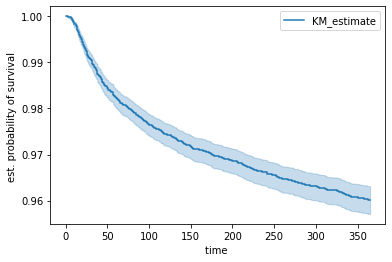

In [9]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
kmf_1 = KaplanMeierFitter()
kmf_1.fit(mydata["mi_survivaltime"],mydata["mi_yn"])
ax = kmf_1.plot_survival_function()
ax.set_ylabel("est. probability of survival ")
ax.set_xlabel("time ")

## 각 군별로 KM curve 산출

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 1.0, 'Lifespans of different statin use')

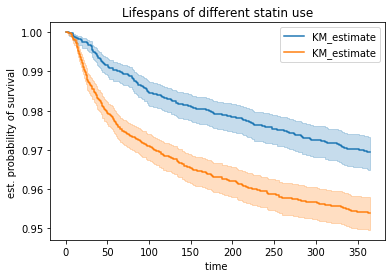

In [10]:
kmf_2 = KaplanMeierFitter()
kmf_2.fit(mydata.loc[mydata['medication_statin'] == "0","mi_survivaltime"], mydata.loc[mydata['medication_statin'] == "0","mi_yn"])
ax = kmf_2.plot_survival_function()
ax.set_ylabel("est. probability of survival ")
ax.set_xlabel("time ")
kmf_2.fit(mydata.loc[mydata['medication_statin'] == "1","mi_survivaltime"], mydata.loc[mydata['medication_statin'] == "1","mi_yn"])
ax = kmf_2.plot_survival_function()
ax.set_ylabel("est. probability of survival ")
ax.set_xlabel("time ")
plt.title("Lifespans of different statin use")

In [51]:
a = mydata.loc[mydata['medication_statin'] == "0","mi_survivaltime"].tolist()
b = mydata.loc[mydata['medication_statin'] == "1","mi_survivaltime"].tolist()
c = mydata.loc[mydata['medication_statin'] == "0","mi_yn"].tolist()
d = mydata.loc[mydata['medication_statin'] == "1","mi_yn"].tolist()
a = [int(i) for i in a]
b = [int(i) for i in b]
c = [int(i) for i in c]
d = [int(i) for i in d]

In [52]:
from lifelines.statistics import logrank_test
results = logrank_test(a,b,c,d,alpha=.95)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          25.87 <0.005     21.39

#Cox Model

In [54]:
#@title 스타틴 복용 유무만

from lifelines import CoxPHFitter
cph = CoxPHFitter().fit(mydata[['mi_survivaltime','mi_yn','medication_statin']], 'mi_survivaltime', 'mi_yn')
cph.print_summary()

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 18390 total observations, 0 right-censored observations>
             duration col = 'mi_survivaltime'
                event col = 'mi_yn'
      baseline estimation = breslow
   number of observations = 18390
number of events observed = 18390
   partial log-likelihood = -162181.80
         time fit was run = 2022-12-13 06:09:35 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
medication_statin  -0.08       0.92       0.01            -0.11            -0.05                 0.89                 0.95

                    cmp to     z      p   -log2(p)
covariate                                         
medication_statin     0.00 -5.63 <0.005      25.73
---
Concordance = 0.57
Partial AIC = 324365.59
log-likelihood ratio test = 31.57 on 1 df
-log2(p) of ll-ratio test = 25.63

In [73]:
#@title 스타틴 복용 유무, 연령/성별/CCI보정
mydata['gender']= mydata['gender'] == 'F'
from lifelines import CoxPHFitter
cph = CoxPHFitter().fit(mydata[['mi_survivaltime','mi_yn','medication_statin','age_year','gender','cci']], 'mi_survivaltime', 'mi_yn')
cph.print_summary()

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 18390 total observations, 0 right-censored observations>
             duration col = 'mi_survivaltime'
                event col = 'mi_yn'
      baseline estimation = breslow
   number of observations = 18390
number of events observed = 18390
   partial log-likelihood = -162164.83
         time fit was run = 2022-12-13 06:16:36 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
medication_statin  -0.08       0.92       0.01            -0.11            -0.05                 0.89                 0.95
age_year            0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
gender              0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
cci                 0.02       1.02       0.00             0.01             0.02                 1.01                 1.02

                    cmp to     z      p   -log2(p)
covariate                                         
medication_statin     0.00 -5.60 <0.005      25.49
age_year              0.00  2.99 <0.005       8.47
gender                0.00  0.25   0.80       0.32
cci                   0.00  4.69 <0.005      18.46
---
Concordance = 0.67
Partial AIC = 324337.65
log-likelihood ratio test = 65.51 on 4 df
-log2(p) of ll-ratio test = 42.18

# 사망 분석

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 0, 'time ')

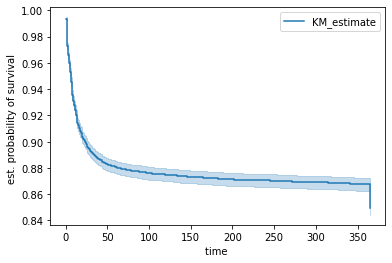

In [67]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
kmf_1 = KaplanMeierFitter()
kmf_1.fit(mydata["death_survivaltime"],mydata["death_yn"])
ax = kmf_1.plot_survival_function()
ax.set_ylabel("est. probability of survival ")
ax.set_xlabel("time ")

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 1.0, 'Lifespans of different statin use')

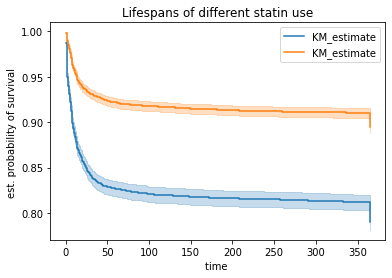

In [68]:
kmf_2 = KaplanMeierFitter()
kmf_2.fit(mydata.loc[mydata['medication_statin'] == "0","death_survivaltime"], mydata.loc[mydata['medication_statin'] == "0","death_yn"])
ax = kmf_2.plot_survival_function()
ax.set_ylabel("est. probability of survival ")
ax.set_xlabel("time ")
kmf_2.fit(mydata.loc[mydata['medication_statin'] == "1","death_survivaltime"], mydata.loc[mydata['medication_statin'] == "1","death_yn"])
ax = kmf_2.plot_survival_function()
ax.set_ylabel("est. probability of survival ")
ax.set_xlabel("time ")
plt.title("Lifespans of different statin use")

In [69]:
#@title 스타틴 복용 유무만

from lifelines import CoxPHFitter
cph = CoxPHFitter().fit(mydata[['death_survivaltime','death_yn','medication_statin']], 'death_survivaltime', 'death_yn')
cph.print_summary()

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 18390 total observations, 0 right-censored observations>
             duration col = 'death_survivaltime'
                event col = 'death_yn'
      baseline estimation = breslow
   number of observations = 18390
number of events observed = 18390
   partial log-likelihood = -162179.13
         time fit was run = 2022-12-13 06:15:43 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
medication_statin  -0.09       0.91       0.01            -0.12            -0.06                 0.89                 0.94

                    cmp to     z      p   -log2(p)
covariate                                         
medication_statin     0.00 -6.09 <0.005      29.71
---
Concordance = 0.60
Partial AIC = 324360.26
log-likelihood ratio test = 36.90 on 1 df
-log2(p) of ll-ratio test = 29.58

In [74]:
#@title 스타틴 복용 유무, 연령/성별/CCI보정
# mydata['gender']= mydata['gender'] == 'F'
from lifelines import CoxPHFitter
cph = CoxPHFitter().fit(mydata[['death_survivaltime','death_yn','medication_statin','age_year','gender','cci']], 'death_survivaltime', 'death_yn')
cph.print_summary()

/usr/local/lib/python3.8/dist-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.CoxPHFitter: fitted with 18390 total observations, 0 right-censored observations>
             duration col = 'death_survivaltime'
                event col = 'death_yn'
      baseline estimation = breslow
   number of observations = 18390
number of events observed = 18390
   partial log-likelihood = -162164.18
         time fit was run = 2022-12-13 06:16:40 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
medication_statin  -0.09       0.91       0.01            -0.12            -0.06                 0.89                 0.94
age_year            0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
gender              0.00       1.00       0.02            -0.03             0.03                 0.97                 1.03
cci                 0.01       1.01       0.00             0.01             0.02                 1.01                 1.02

                    cmp to     z      p   -log2(p)
covariate                                         
medication_statin     0.00 -6.14 <0.005      30.18
age_year              0.00  3.59 <0.005      11.59
gender                0.00  0.02   0.98       0.03
cci                   0.00  3.77 <0.005      12.57
---
Concordance = 0.70
Partial AIC = 324336.37
log-likelihood ratio test = 66.79 on 4 df
-log2(p) of ll-ratio test = 43.08